In [1]:
import numpy as np
from qutip import *

In [3]:
lam = 0.01
gamma_0 = 0.5
# time = np.linspace(0.1, 200, 100)  # Adjust time range as needed
times = time = np.linspace(0.1, 100, 2000000)  #np.linspace(0.1,100, 100)

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression

def s(t):
    return np.imag(Expr(t))

#Define Hamiltonian

H0 = sigmam()*sigmap()

def gam(t):
    return np.real(Expr(t))

gam_vals = np.array([gam(t) for t in time])



In [4]:
from mpmath import *

#Define Hamiltonian

H0 = sigmam()*sigmap()

ops_and_rates = [[sigmap(),gam]]  # time-dependent collapse term
# c_ops = [[sigmap(),gam]]  # time-dependent collapse term

c_ops = [[sigmap(),gam_vals]]  # time-dependent collapse term


H_zero = Qobj(np.zeros((2, 2)))  # Zero operator for the Hamiltonian


#s(10,args)
# times = np.linspace(0.1, 100, 200)

psi0 = (basis(2, 0) + basis(2, 1)).unit() 


#[[H0,s]]
e_ops = [sigmax(), sigmay(), sigmaz()]

options = Options(store_states=True, nsteps=5000000, atol=1e-8, rtol=1e-6)

result2 = mesolve(H_zero, psi0, time, c_ops, e_ops, options = options)



c:\Users\DELL\anaconda3\envs\qiskit\Lib\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7480\1246033994.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7480\1246033994.py:13: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)


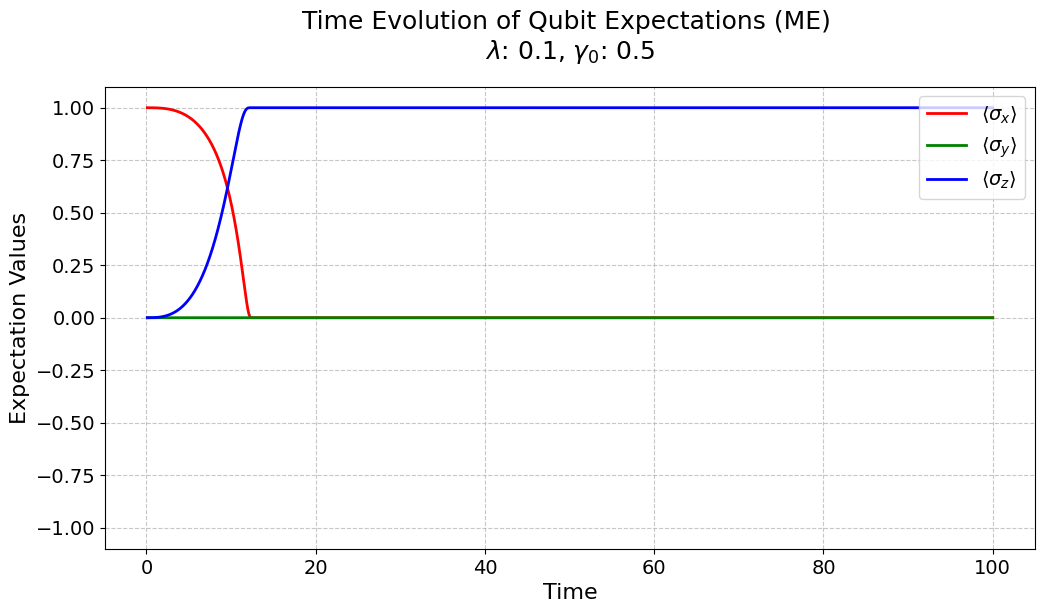

In [5]:
import matplotlib.pyplot as plt

# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(result2.times, result2.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result2.times, result2.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (ME) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


### Pre-Calculated Answers

In [17]:
# Manually Solving 
lam = 0.1
gamma_0 = 0.5
def G(t):
    l = np.emath.sqrt(lam**2-2*gamma_0*lam)
    return np.exp(-(lam/2)*t)*(np.cosh((l*t)/2)+(lam/l)*np.sinh((l*t)/2))

# rho = 
psi0 = (basis(2, 0) + basis(2, 1)).unit() 

rho = ket2dm(psi0)
rho[0,0]

def rho_t(rho,t):
    rho = np.array(rho)
    rho.reshape(2,2)
    rho_00 = (1-G(t)**2)*rho[1,1] + rho[0,0]
    rho_01 = rho[0,1]*G(t) #I've to take conjugate Here! 
    rho_01 = rho[0,1]*np.conjugate(G(t))
    rho_10 = rho[1,0]*G(t)
    rho_11 = rho[1,1]*G(t)**2

    rho_1 = rho

    rho_1[0,0] = rho_00
    rho_1[0,1] = rho_01
    rho_1[1,0] = rho_10
    rho_1[1,1] = rho_11



    return rho_1


#operator_to_vector(rho)
def expec_x(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return 2*np.real(fuc)

def expec_y(rho,t): # rho is 2*2 matrix
    fuc = rho[1,0]*G(t)
    return -2*np.imag(fuc)


def expec_z(rho,t): # rho is 2*2 matrix
    fuc = 1 - 2*rho[1,1]*(G(t)**2)
    return fuc


# print(rho_t(rho,10))

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\g'
C:\Users\DELL\AppData\Local\Temp\ipykernel_20388\1363098253.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
C:\Users\DELL\AppData\Local\Temp\ipykernel_20388\1363098253.py:18: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')


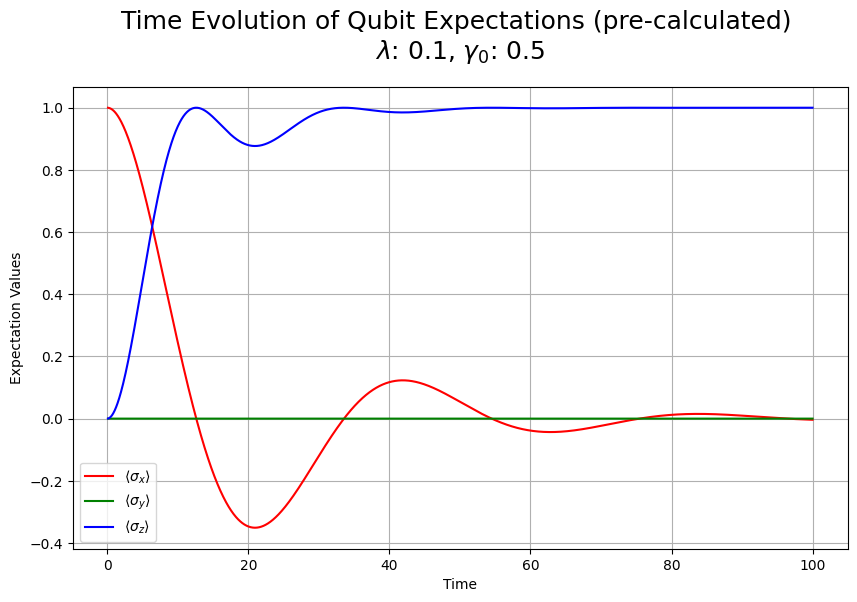

In [18]:
# Time array
time = np.linspace(0.1, 100, 2000)

# Calculate expectation values
expec_x_vals = [expec_x(rho, t) for t in time]
expec_y_vals = [expec_y(rho, t) for t in time]
expec_z_vals = [expec_z(rho, t) for t in time]

expec_z_vals

# # Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, expec_x_vals, label=r'$\langle \sigma_x \rangle$', color='r')
plt.plot(time, expec_y_vals, label=r'$\langle \sigma_y \rangle$', color='g')
plt.plot(time, expec_z_vals, label=r'$\langle \sigma_z \rangle$', color='b')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.title(f"Time Evolution of Qubit Expectations (pre-calculated) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#('Expectation Values vs Time(lam < 2gamma_0)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

lam = 0.1
gamma_0 = 0.5
times = np.linspace(0.1, 100, 10000)

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)
    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))
    return expression

def s(t):
    return np.imag(Expr(t))

def gam(t):
    return np.real(Expr(t))

H0 = sigmam()*sigmap()
H =  Qobj(np.zeros((2, 2)))  # Zero operator for the Hamiltonian
 # Or H_zero, since s(t)=0 doesn't matter
c_ops = [[sigmam(), gam]]  # Changed to sigmam()

psi0 = (basis(2, 0) + basis(2, 1)).unit()
e_ops = [sigmax(), sigmay(), sigmaz()]

options = Options(store_states=True, nsteps=500000, atol=1e-8, rtol=1e-6)
result2 = mesolve(H, psi0, times, c_ops, e_ops, options=options)

plt.figure(figsize=(10, 6))
plt.plot(times, result2.expect[0], label=r'$\langle \sigma_x \rangle$')
plt.plot(times, result2.expect[1], label=r'$\langle \sigma_y \rangle$')
plt.plot(times, result2.expect[2], label=r'$\langle \sigma_z \rangle$')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.legend()
plt.title('Time Evolution of Pauli Operator Expectation Values')
plt.grid(True)
plt.show()

IntegratorException: Excess work done on this call. Try to increasing the nsteps parameter in the Options class